In [1]:
pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Part 1

Diagram of Class Hierarchy

  ![Neuron Hierarchy](neuron_classes.png)

Basic Code for Classes

In [3]:
class Neuron:
    def __init__(self, firing_rate): 
        self.firing_rate = firing_rate # how frequently neuron fires

    def activate(self, stimulus):
        # calculates firing rate based on strength of stimulus
        pass

class SensoryNeuron (Neuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
    
    def sense_stimulus(self, stimulus):
        # activates neuron based on stimulus
        pass

class MotorNeuron (Neuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    
    def control_muscle(self, activity_level):
        # triggers target muscle based on neuron's activity
        pass

class AlphaMotorNeuron (MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate,"skeletal muscle")

    def control_skeletal_muscle(self, activity_level):
        pass

class GammaMotorNeuron (MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "muscle spindle")
    
    def control_muscle_spindle(self, activity_level):
        pass

class Photoreceptor (SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "light")
    def light_detection(self, light_intensity):
        pass

class MechanoRecepter (SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "pressure")
    def pressure_detection(self, pressure_level):
        pass

Part 2

Question 1: Downsized Sine Curve

"Write a function that samples a sinusoidal signal while preserving all maximum
and minimum points."

In [4]:
def downsize_sin (sin_curve):
    # Find the max points in the graph
    # Using slope / derivative to check when sign changes
    max = (np.diff(np.sign(np.diff(sin_curve))) < 0).nonzero()[0] + 1

    # Do the same for min points in the graph
    min = (np.diff(np.sign(np.diff(sin_curve))) > 0).nonzero()[0] + 1
    
    # Save only every fifth value in the given sin curve
    downsized_array = np.arange(0, len(sin_curve), 5)

    # Combine the downsized array points with the found maxes and mins
    # Making sure to sort and erase if there are repeated values
    array_with_max_min = np.sort(np.unique(np.concatenate((downsized_array, max, min))))

    # Return the points and the new sin curve 
    downsized_sin = sin_curve[array_with_max_min]
    return downsized_sin, array_with_max_min

"Input to function: a NumPy array representing a sinusoidal signal with a frequency of 5Hz,sampled every 0.01 seconds.
Output: a new numpy array representing the same signal. The length of the new array
should be approximately 20% of the original one."

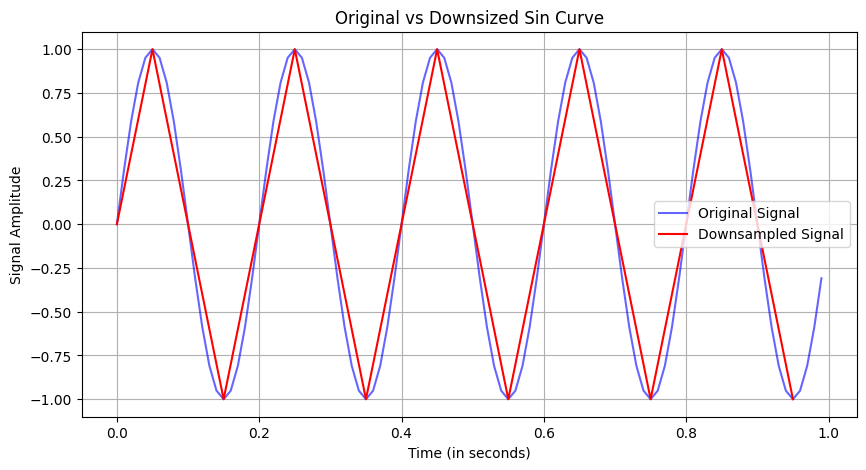

In [5]:
# Define a sin equation to be used as input to the function
t = np.arange(0, 1, 0.01)  # Time from 0 to 1 second incrementing by 0.01s
frequency = 5  # 5Hz frequency
signal = np.sin(2 * np.pi * frequency * t)

# Apply the function we defined on the given curve
downsized_curve, downsized_indices = downsize_sin(signal)

# Plot the input and the output
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label="Original Signal", color="blue", alpha=0.6)
plt.plot(t[downsized_indices], downsized_curve, label="Downsampled Signal", color="red")
plt.title("Original vs Downsized Sin Curve")
plt.xlabel("Time (in seconds)")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.grid()
plt.show()

Question 2: Laptop Dataset

In [6]:
# Load the given data on laptops
df = pd.read_csv('laptop_price - dataset.csv')

"Plot the price of all the laptops."

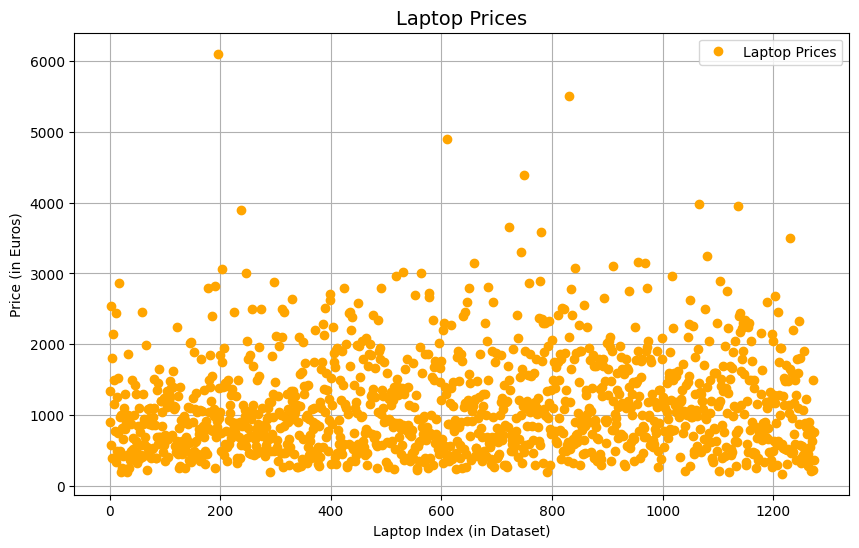

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Price (Euro)'], marker='o', linestyle='', color='orange', label='Laptop Prices')
plt.title('Laptop Prices', fontsize=14)
plt.xlabel('Laptop Index (in Dataset)', fontsize=10)
plt.ylabel('Price (in Euros)', fontsize=10)
plt.grid()
plt.legend()
plt.show()

"Which company has on average the most expensive laptop?"

In [8]:
# Find average for each company
avg_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
# Find highest average price
most_expensive_company = avg_prices.idxmax()
print(f"The company with the most expensive laptops on average is: {most_expensive_company}")

The company with the most expensive laptops on average is: Razer


"What is the average laptop price for each company?"

In [9]:
# Print a list of averages for each company
print("Average price of laptops for each company:")
# Print without the first line of the names of the columns (to_string)
# And rename_axis removes the title of the company column
print(avg_prices.rename_axis(None).to_string())

Average price of laptops for each company:
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000


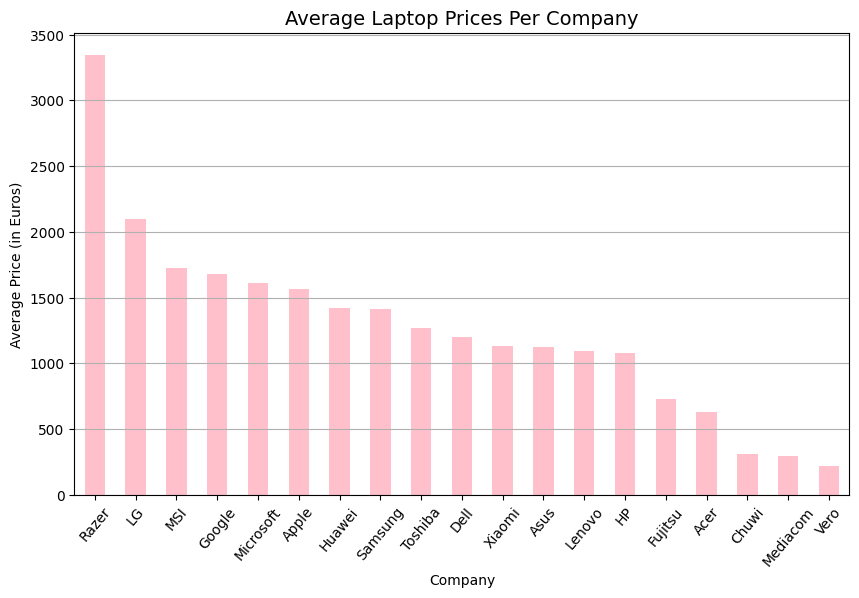

In [10]:
# Plot the average price per company
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar', color='pink')
plt.title('Average Laptop Prices Per Company', fontsize=14)
plt.xlabel('Company', fontsize=10)
plt.ylabel('Average Price (in Euros)', fontsize=10)
plt.xticks(rotation=50)
plt.grid(axis='y')
plt.show()

"Find the different types of Operating systems present in the data - under the column
name "OpSys". Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform."

In [11]:
df['OpSys'] = df['OpSys'].str.lower().replace({
    'macos': 'mac',
    'mac os': 'mac',
    'mac os x': 'mac',
    'windows 7': 'windows',
    'windows 10': 'windows',
    'windows 11': 'windows',
    'windows 10 s': 'windows',
    'no os': 'no os',
    'linux': 'linux',
    'ubuntu': 'linux'
})
all_os = df['OpSys'].unique() # only look at the ones that are different
print("Operating Systems:")
print(all_os) # print the operaitng systems

Operating Systems:
['mac' 'no os' 'windows' 'linux' 'android' 'chrome os']


"Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems."

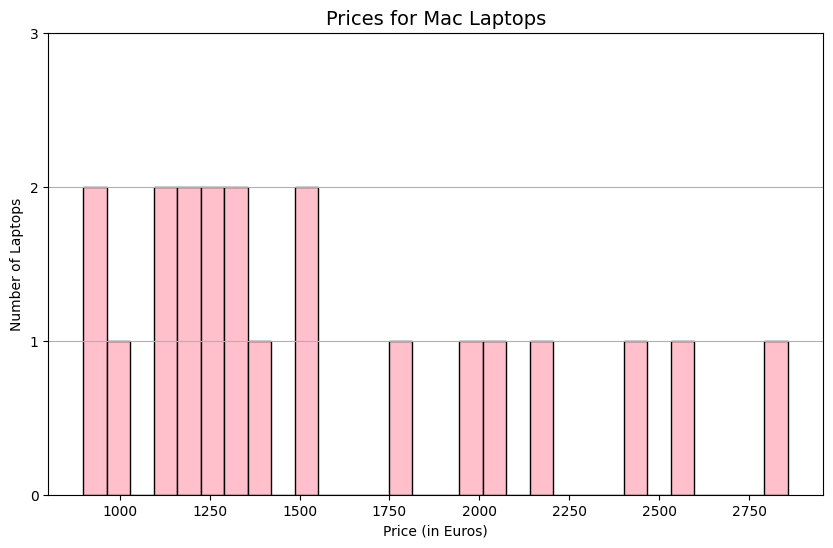

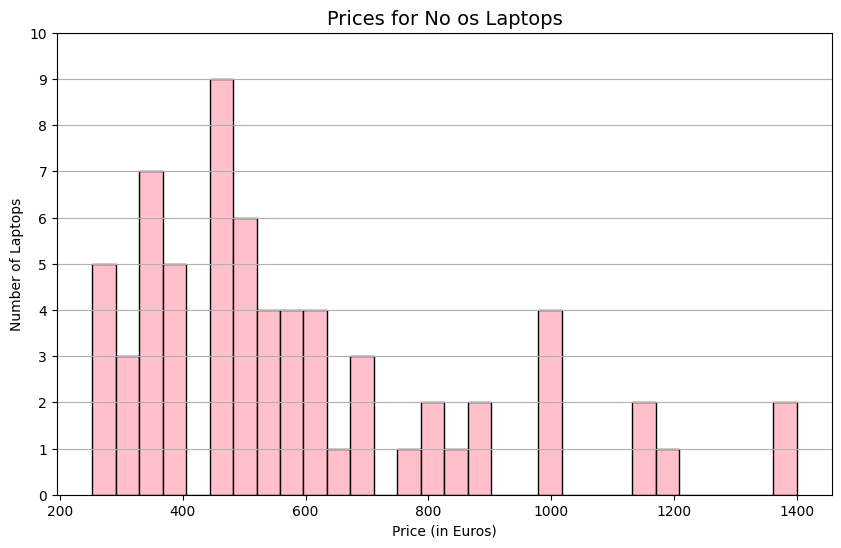

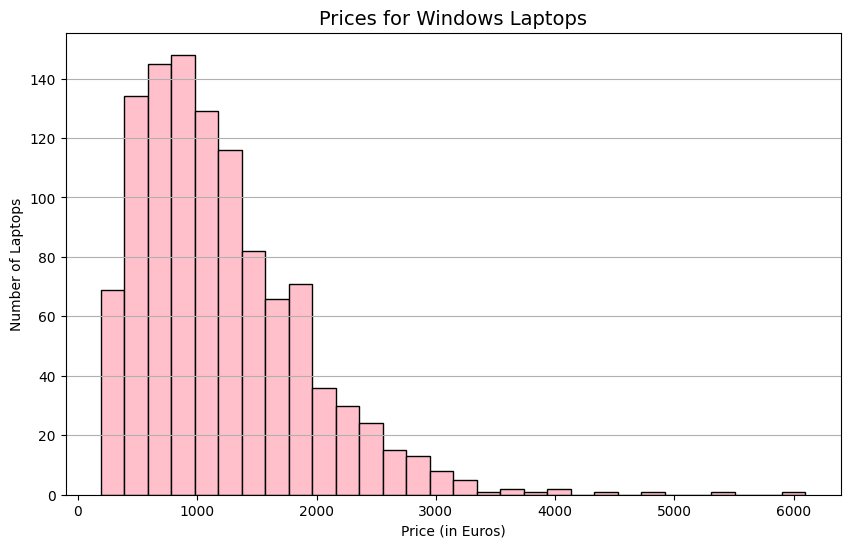

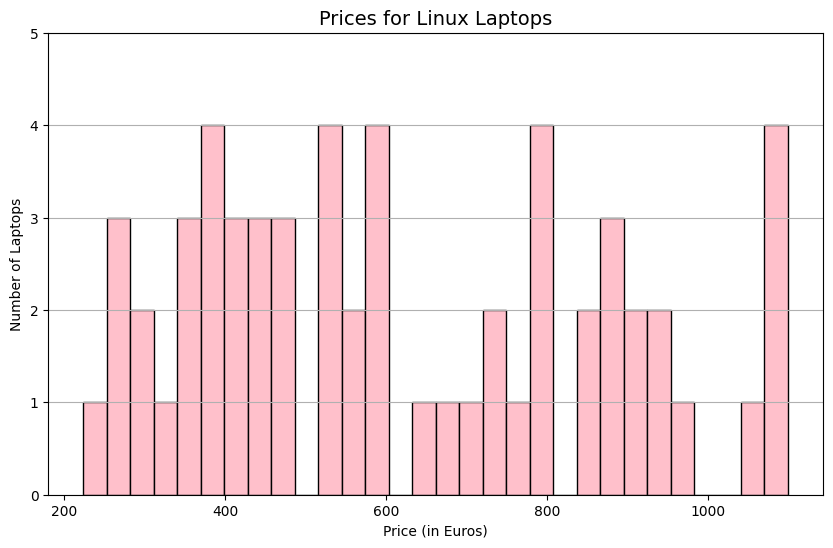

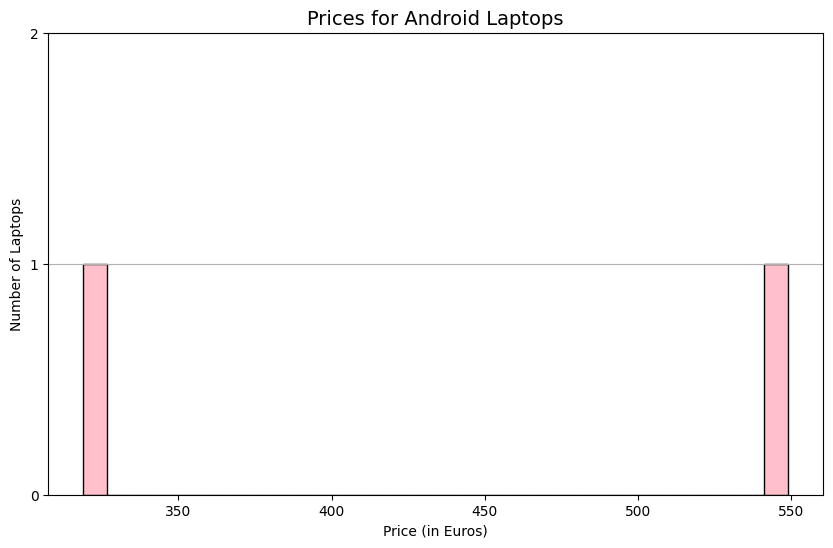

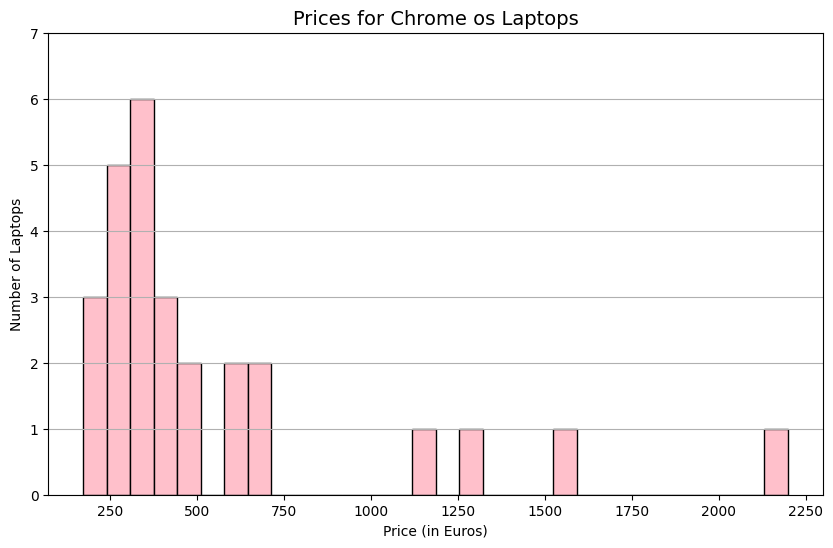

In [12]:
os_options = df['OpSys'].unique() # find all the different operating systems

# Make a graph for each of them
for os in os_options:
    subset = df[df['OpSys'] == os]
    plt.figure(figsize=(10, 6))
    plt.hist(subset['Price (Euro)'], bins=30, color='pink', edgecolor='black')
    plt.title(f'Prices for {os.capitalize()} Laptops', fontsize=14)
    plt.xlabel('Price (in Euros)', fontsize=10)
    plt.ylabel('Number of Laptops', fontsize=10)
    plt.grid(axis='y') # get rid of extra y lines

    # Need to adust y ticks to only be whole numbers
    if os != 'windows':  # for windows increments by more than 1
        plt.yticks(np.arange(0, plt.gca().get_ylim()[1] + 1, step=1))

    plt.show()

"What is the relationship between RAM and computer price?
Add an adequate plot to support your findings."

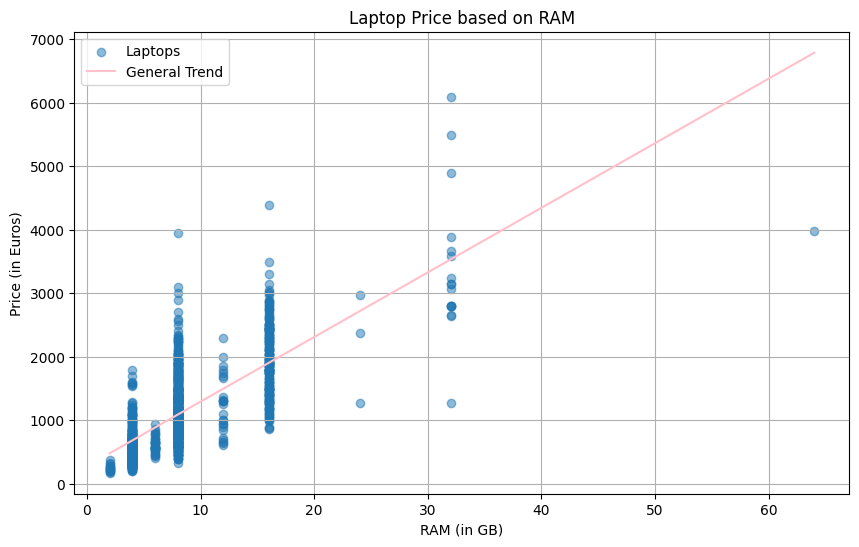

In [13]:
plt.figure(figsize=(10, 6))
# Make a scatter plot of all the prices
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5, label='Laptops')

# Find an equation for the general trend
x = df['RAM (GB)'] # define x axis
y = df['Price (Euro)'] # and y axis
coefficients = np.polyfit(x, y, 1)  # find coefficents for equation
line = np.poly1d(coefficients) # turn it into an equation
x_points = np.linspace(x.min(), x.max(), 500)  # upsample to get more x values
y_points = line(x_points) # find their y values based on equation

# Plot the line that fits the general trend
plt.plot(x_points, y_points, color='pink', linewidth=1.5, label='General Trend')

# Display the graph 
plt.title('Laptop Price based on RAM', fontsize=12)
plt.xlabel('RAM (in GB)', fontsize=10)
plt.ylabel('Price (in Euros)', fontsize=10)
plt.grid()
plt.legend()
plt.show()

"Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory"."

In [14]:
# Basic find and replace in python
# Replaces any word with 'GB' or 'TB' in them to blank space
# Strip takes out extra space at end of string if there is
df['Storage type'] = df['Memory'].str.replace(r'\b\w*(GB|TB)\w*\b', '', regex=True).str.strip()

# After printing unique storage types, I realized I needed to fix some manually
df['Storage type'] = df['Storage type'].replace({
    'SSD +   HDD': 'SSD + HDD',
    'SSD +   SSD': 'SSD',
    '1. Hybrid': 'Hybrid',
    'Flash Storage +   HDD':'Flash Storage + HDD',
    'HDD +   HDD': 'HDD',
    '1. HDD': 'HDD',
    'SSD +  1. Hybrid': 'SSD + Hybrid'
})
# Print the values in the new column just to make sure it worked
print("Unique values in 'Storage type' column in new data set:")
print(df['Storage type'].unique())


Unique values in 'Storage type' column in new data set:
['SSD' 'Flash Storage' 'HDD' 'SSD + HDD' 'Hybrid' 'Flash Storage + HDD'
 'SSD + Hybrid']


"Think of additional questions related to this data. What types of
analyses and visualizations would you use to address them? Select two questions from your list and implement. Submit your list of questions, suggested analyses and visualization and the implementation."

1. Does the size impact the price?
2. What is the relationship between memory and size?
(Does the computer need to be bigger to have more memory?)
4. And what about memory and price?
5. How about weight and size? 
6. Are lighter computers more expensive?

"Select two questions from your list and implement."

What is the relationship between weight and size? 


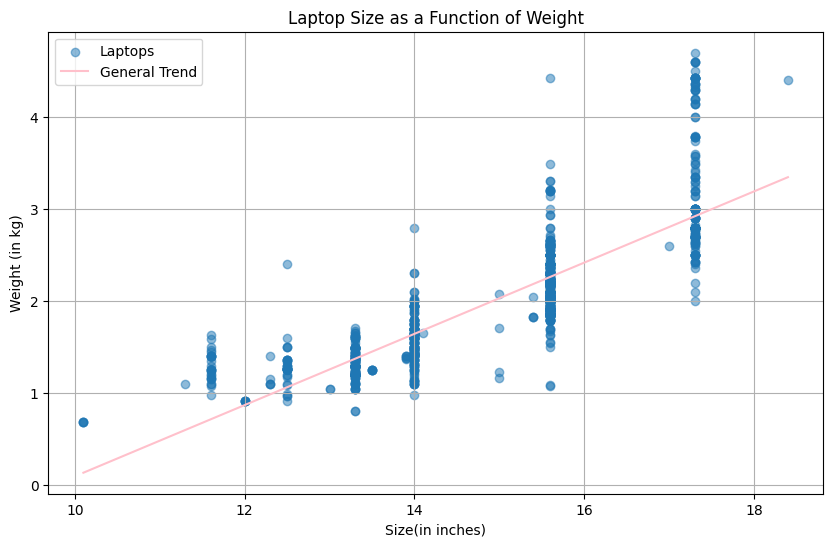

In [15]:
plt.figure(figsize=(10, 6))
# Make a scatter plot of all the weights based on size
plt.scatter(df['Inches'], df['Weight (kg)'],alpha=0.5, label='Laptops')

# Find an equation for the general trend
x = df['Inches'] # define x axis
y = df['Weight (kg)'] # and y axis
coefficients = np.polyfit(x, y, 1)  # find coefficents for equation
line = np.poly1d(coefficients) # turn it into an equation
x_points = np.linspace(x.min(), x.max(), 500)  # upsample to get more x values
y_points = line(x_points) # find their y values based on equation

# Plot the line that fits the general trend
plt.plot(x_points, y_points, color='pink', linewidth=1.5, label='General Trend')

# Display the graph 
plt.title('Laptop Size as a Function of Weight', fontsize=12)
plt.xlabel('Size(in inches)', fontsize=10)
plt.ylabel('Weight (in kg)', fontsize=10)
plt.grid()
plt.legend()
plt.show()

Turns out that weight and size are very related, which makes sense.
Let's see if the same is true for the next question:

What is the relationship between weight and price?

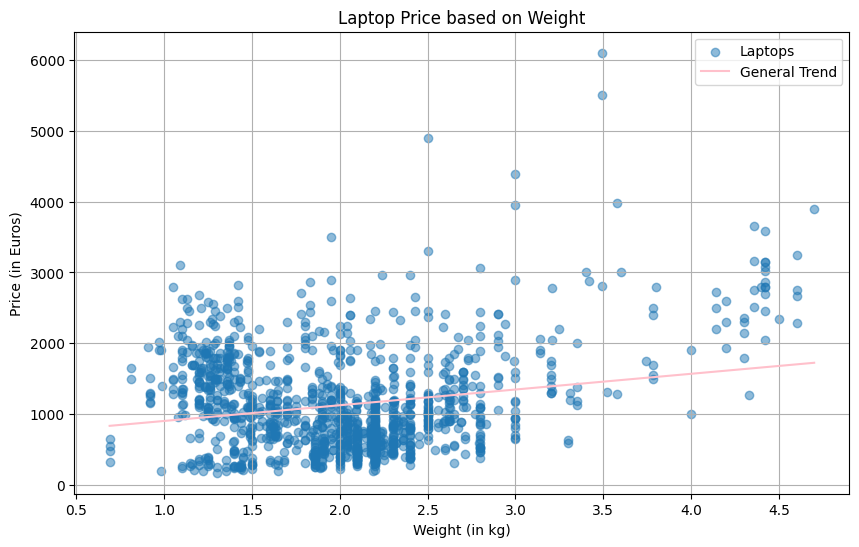

In [16]:
plt.figure(figsize=(10, 6))
# Make a scatter plot of all the prices based on weight
plt.scatter(df['Weight (kg)'], df['Price (Euro)'], alpha=0.5, label='Laptops')

# Find an equation for the general trend
x = df['Weight (kg)'] # define x axis
y = df['Price (Euro)'] # and y axis
coefficients = np.polyfit(x, y, 1)  # find coefficents for equation
line = np.poly1d(coefficients) # turn it into an equation
x_points = np.linspace(x.min(), x.max(), 500)  # upsample to get more x values
y_points = line(x_points) # find their y values based on equation

# Plot the line that fits the general trend
plt.plot(x_points, y_points, color='pink', linewidth=1.5, label='General Trend')

# Display the graph 
plt.title('Laptop Price based on Weight', fontsize=12)
plt.xlabel('Weight (in kg)', fontsize=10)
plt.ylabel('Price (in Euros)', fontsize=10)
plt.grid()
plt.legend()
plt.show()

Not as strong of a relationship exists, which also makes sense. People aren't paying for the weight of the computer, but for how well it works.